In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import missingno as msno
import seaborn as sns

### Delaware EDA

In [2]:
df_de = pd.read_excel('./data/covid-19-prison-data-DE.xlsx')

In [3]:
df_de.head()

,name,abbreviation,staff_tests,staff_tests_with_multiples,weekly_staff_cases,total_staff_cases,weekly_staff_recovered,staff_recovered,weekly_staff_deaths,total_staff_deaths,prisoner_tests,prisoner_tests_with_multiples,weekly_cases,total_prisoner_cases,weekly_prisoners_recovered,prisoners_recovered,total_prisoner_deaths,as_of_date
0,Delaware,DE,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,4.0,NaN,0,0,0,0,0,2020-03-24
1,Delaware,DE,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,5.0,NaN,0,0,0,0,0,2020-04-01
2,Delaware,DE,NaN,NaN,6.0,6.0,0.0,0.0,0.0,0.0,NaN,NaN,2,2,0,0,0,2020-04-08
3,Delaware,DE,NaN,NaN,12.0,18.0,0.0,0.0,0.0,0.0,NaN,NaN,11,13,0,0,0,2020-04-15
4,Delaware,DE,NaN,NaN,8.0,26.0,0.0,0.0,0.0,0.0,136.0,NaN,28,41,0,0,1,2020-04-22


<AxesSubplot:>

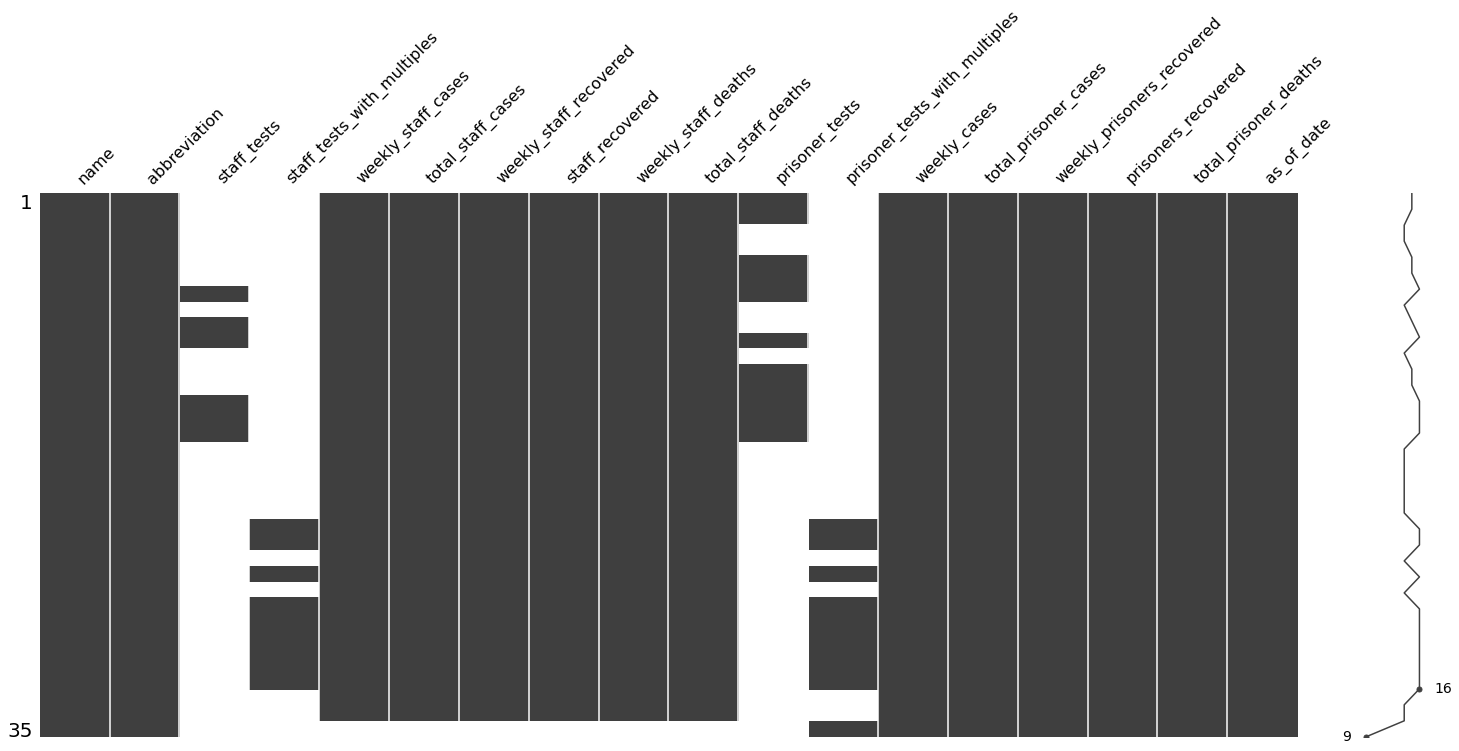

In [4]:
msno.matrix(df_de)

<AxesSubplot:>

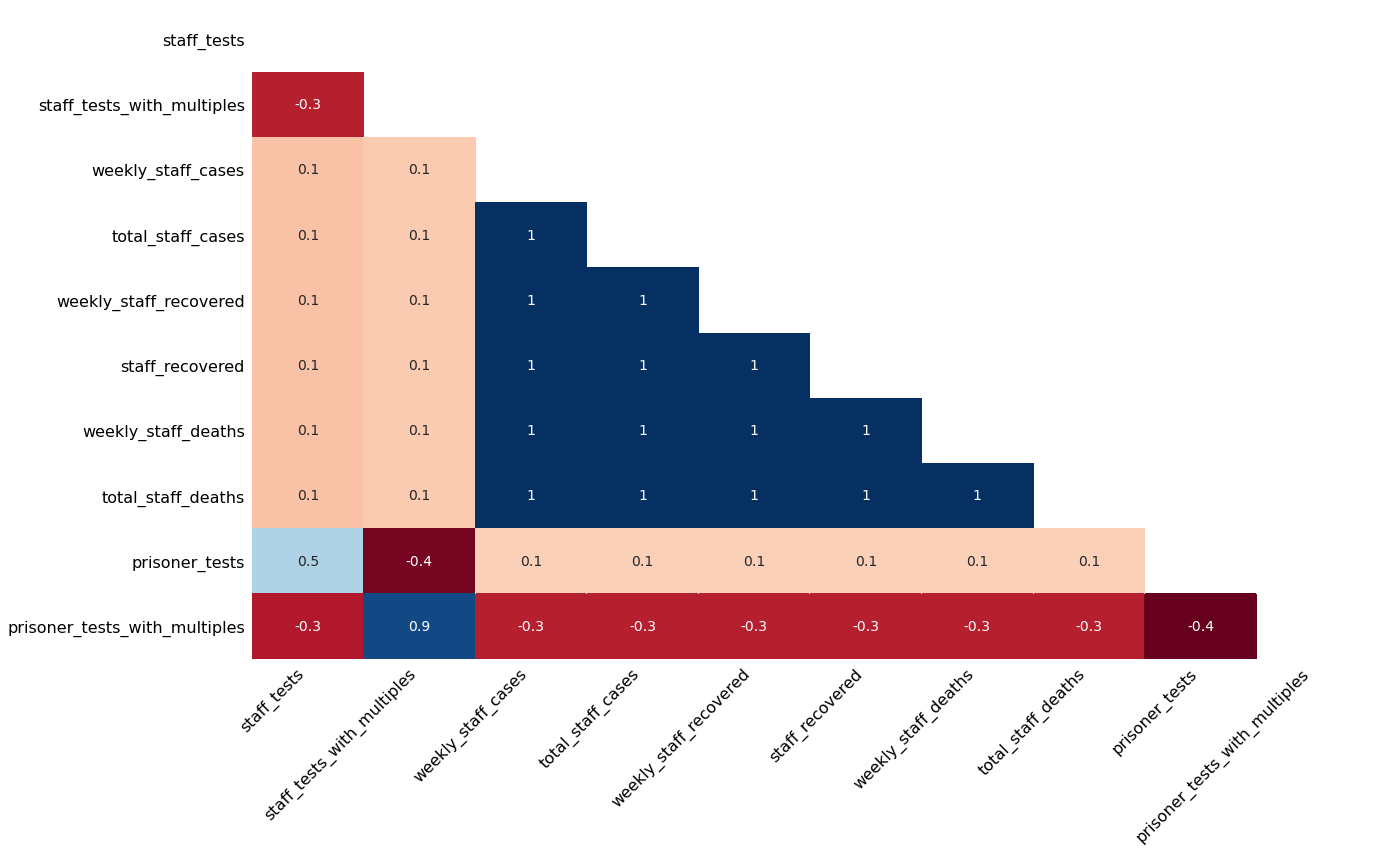

In [5]:
msno.heatmap(df_de)

### Data Types

In [6]:
df_de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   name                           35 non-null     object        
 1   abbreviation                   35 non-null     object        
 2   staff_tests                    6 non-null      float64       
 3   staff_tests_with_multiples     9 non-null      float64       
 4   weekly_staff_cases             34 non-null     float64       
 5   total_staff_cases              34 non-null     float64       
 6   weekly_staff_recovered         34 non-null     float64       
 7   staff_recovered                34 non-null     float64       
 8   weekly_staff_deaths            34 non-null     float64       
 9   total_staff_deaths             34 non-null     float64       
 10  prisoner_tests                 11 non-null     float64       
 11  prisoner_tests_with_m

In [7]:
df_de['as_of_date'] = pd.to_datetime(df_de['as_of_date'])

In [8]:
df_de['year'] = df_de['as_of_date'].dt.year

In [9]:
df_de['month'] = df_de['as_of_date'].dt.month

In [10]:
def to_month(num):
    num = int(num)
    if num == 1:
        return 'Jan'
    elif num == 2:
        return 'Feb'
    elif num == 3:
        return 'Mar'
    elif num == 4:
        return 'Apr'
    elif num == 5:
        return 'May'
    elif num == 6:
        return 'Jun'
    elif num == 7:
        return 'Jul'
    elif num == 8:
        return 'Aug'
    elif num == 9:
        return 'Sept'
    elif num == 10:
        return 'Oct'
    elif num == 11:
        return 'Nov'
    else:
        return 'Dec'
    
df_de['month'] = df_de['month'].map(to_month)
df_de['month']

0      Mar
1      Apr
2      Apr
3      Apr
4      Apr
5      Apr
6      May
7      May
8      May
9      May
10     Jun
11     Jun
12     Jun
13     Jun
14     Jun
15     Jul
16     Jul
17     Jul
18     Jul
19     Aug
20     Aug
21     Aug
22     Aug
23    Sept
24    Sept
25    Sept
26     Oct
27     Oct
28     Nov
29     Nov
30     Nov
31     Dec
32     Dec
33     Dec
34     Jan
Name: month, dtype: object

In [11]:
df_de['week'] = df_de['as_of_date'].dt.isocalendar().week
df_de['week']

0     13
1     14
2     15
3     16
4     17
5     18
6     19
7     20
8     21
9     22
10    23
11    24
12    24
13    26
14    27
15    28
16    28
17    30
18    31
19    32
20    33
21    34
22    35
23    37
24    38
25    39
26    40
27    44
28    45
29    46
30    47
31    49
32    52
33    53
34     2
Name: week, dtype: UInt32

In [12]:
df_de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   name                           35 non-null     object        
 1   abbreviation                   35 non-null     object        
 2   staff_tests                    6 non-null      float64       
 3   staff_tests_with_multiples     9 non-null      float64       
 4   weekly_staff_cases             34 non-null     float64       
 5   total_staff_cases              34 non-null     float64       
 6   weekly_staff_recovered         34 non-null     float64       
 7   staff_recovered                34 non-null     float64       
 8   weekly_staff_deaths            34 non-null     float64       
 9   total_staff_deaths             34 non-null     float64       
 10  prisoner_tests                 11 non-null     float64       
 11  prisoner_tests_with_m

In [13]:
df_de['week'].astype(int)

0     13
1     14
2     15
3     16
4     17
5     18
6     19
7     20
8     21
9     22
10    23
11    24
12    24
13    26
14    27
15    28
16    28
17    30
18    31
19    32
20    33
21    34
22    35
23    37
24    38
25    39
26    40
27    44
28    45
29    46
30    47
31    49
32    52
33    53
34     2
Name: week, dtype: int64

In [14]:
(df_de['year'] == 2020).groupby(df_de['month']).value_counts()

month  year 
Apr    True     5
Aug    True     4
Dec    True     3
Jan    False    1
Jul    True     4
Jun    True     5
Mar    True     1
May    True     4
Nov    True     3
Oct    True     2
Sept   True     3
Name: year, dtype: int64

In [15]:
df_de.head()

,name,abbreviation,staff_tests,staff_tests_with_multiples,weekly_staff_cases,total_staff_cases,weekly_staff_recovered,staff_recovered,weekly_staff_deaths,total_staff_deaths,...,prisoner_tests_with_multiples,weekly_cases,total_prisoner_cases,weekly_prisoners_recovered,prisoners_recovered,total_prisoner_deaths,as_of_date,year,month,week
0,Delaware,DE,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0,0,0,0,0,2020-03-24,2020,Mar,13
1,Delaware,DE,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0,0,0,0,0,2020-04-01,2020,Apr,14
2,Delaware,DE,NaN,NaN,6.0,6.0,0.0,0.0,0.0,0.0,...,NaN,2,2,0,0,0,2020-04-08,2020,Apr,15
3,Delaware,DE,NaN,NaN,12.0,18.0,0.0,0.0,0.0,0.0,...,NaN,11,13,0,0,0,2020-04-15,2020,Apr,16
4,Delaware,DE,NaN,NaN,8.0,26.0,0.0,0.0,0.0,0.0,...,NaN,28,41,0,0,1,2020-04-22,2020,Apr,17


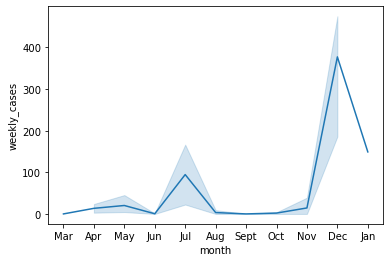

In [16]:
sns.lineplot(data = df_de, x = "month", y="weekly_cases");

In [17]:
region = {'South': ['Alabama', 'Florida', 'Georgia', 'Mississippi', 'South Carolina', 'Puerto Rico',
                    'Arkansas', 'Louisiana', 'Oklahoma', 'Texas', 'Delaware', 'Delaware',
                    'District of Columbia', 'Kentucky', 'Maryland', 'North Carolina', 'Tennessee',
                    'Virginia', 'West Virginia'],
          'Northeast': ['Connecticut','Maine','Massachusetts', 'New Hampshire',
                        'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'],
          'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska',
                      'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
          'West': ['Alaska','Arizona', 'California','Colorado', 'Hawaii', 'Idaho',
                   'Montana', 'Nevada', 'New Mexico', 'Oregon','Utah','Washington', 'Wyoming']         
}

In [18]:
def return_region(val):
    for key, value in region.items():
        if val in value:
            return key

In [19]:
df_de['region'] = df_de['name'].apply(return_region)

In [20]:
df_de.head()

,name,abbreviation,staff_tests,staff_tests_with_multiples,weekly_staff_cases,total_staff_cases,weekly_staff_recovered,staff_recovered,weekly_staff_deaths,total_staff_deaths,...,weekly_cases,total_prisoner_cases,weekly_prisoners_recovered,prisoners_recovered,total_prisoner_deaths,as_of_date,year,month,week,region
0,Delaware,DE,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,2020-03-24,2020,Mar,13,South
1,Delaware,DE,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,2020-04-01,2020,Apr,14,South
2,Delaware,DE,NaN,NaN,6.0,6.0,0.0,0.0,0.0,0.0,...,2,2,0,0,0,2020-04-08,2020,Apr,15,South
3,Delaware,DE,NaN,NaN,12.0,18.0,0.0,0.0,0.0,0.0,...,11,13,0,0,0,2020-04-15,2020,Apr,16,South
4,Delaware,DE,NaN,NaN,8.0,26.0,0.0,0.0,0.0,0.0,...,28,41,0,0,1,2020-04-22,2020,Apr,17,South
